# Importing libraries & dataset

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving automobile.csv to automobile.csv


In [ ]:
auto = pd.read_csv("automobile.csv")

# Basic Data Exploration
*   head of the dataset 
```
df.head() / df.sample()
```
*   the shape of the dataset
```
df.shape
```
*   info of the dataset
```
df.info()
```
*   summary of the dataset
```
# summary for numerical data
df.describe().T
# summary for categorical data
df['categorical_variable'].value_counts()
```







In [ ]:
#It’s better to use .sample() than .head() if you don’t know how your data is sorted.
#auto.sample(5)
auto.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
auto.shape

(201, 29)

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [ ]:
auto.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.000000,0.000000,1.000000,2.000000,3.000000
normalized-losses,201.0,122.000000,31.996250,65.000000,101.000000,122.000000,137.000000,256.000000
wheel-base,201.0,98.797015,6.066366,86.600000,94.500000,97.000000,102.400000,120.900000
length,201.0,0.837102,0.059213,0.678039,0.801538,0.832292,0.881788,1.000000
width,201.0,0.915126,0.029187,0.837500,0.890278,0.909722,0.925000,1.000000
height,201.0,53.766667,2.447822,47.800000,52.000000,54.100000,55.500000,59.800000
curb-weight,201.0,2555.666667,517.296727,1488.000000,2169.000000,2414.000000,2926.000000,4066.000000
engine-size,201.0,126.875622,41.546834,61.000000,98.000000,120.000000,141.000000,326.000000
bore,201.0,3.330692,0.268072,2.540000,3.150000,3.310000,3.580000,3.940000
stroke,197.0,3.256904,0.319256,2.070000,3.110000,3.290000,3.410000,4.170000


## Data Types
*   'b' - boolean
*   'i' - (signed) integer
*   'u' - unsigned integer
*   'f' - floating-point
*   'c' - complex-floating point
*   'O' - (Python) objects
*   'S', 'a' - (byte-)string
*   'U' - Unicode
*   'V' - raw data (void)











In [ ]:
for col in auto.columns:
  if auto[col].dtypes == 'O': 
    print(auto[col].value_counts())

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
jaguar            3
alfa-romero       3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64
std      165
turbo     36
Name: aspiration, dtype: int64
four    115
two      86
Name: num-of-doors, dtype: int64
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64
front    198
rear       3
Name: engine-location, dtype: int64
ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: engine-type, dtype: int64
four      157
six        24
five       10
two         4
eight 

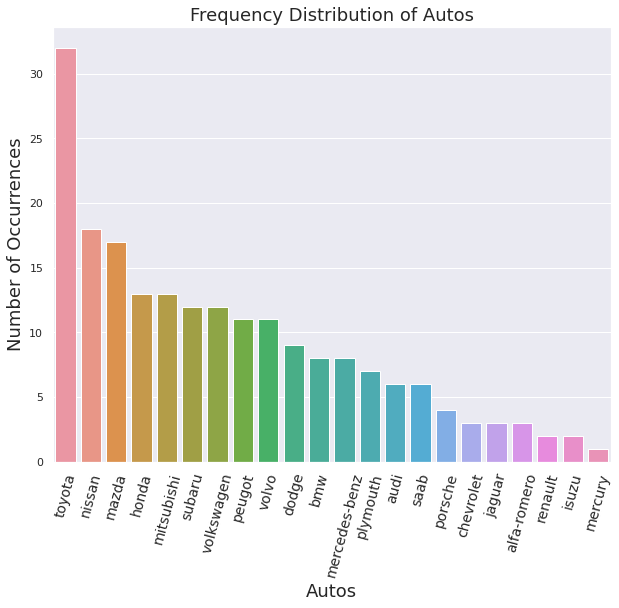

In [ ]:
%matplotlib inline
auto_count = auto['make'].value_counts()
sns.set(style = 'darkgrid')
sns.barplot(auto_count.index, auto_count.values, alpha = 1)
plt.title('Frequency Distribution of Autos', fontsize=18)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xlabel('Autos', fontsize=18)
plt.xticks(fontsize=14, rotation = 75)
fig = plt.gcf()
fig.set_size_inches(10, 8)
#plt.grid()
plt.show()

# Exploratory Data Analysis (EDA)

*   Handle Missing Value
*   Removeing duplicates
*   Outlier Treatment
*   Normalizing & Scaling (Numerical Variables)
*   Encoding (Categorical, Dummy Variables)
*   Bivariate Analysis

## Handling Missing Value
*   Drop the missing values
> In this case, we drop the missing values from those 
variables. In case there are very few missing values you can drop those values.
```Python
dropna()
```
*   Impute with mean value
> For the numerical column, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn’t have extreme values .i.e. outliers.
```Python
fillna()
```
*   Impute with median value
> For the numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use the median approach.
*   Impute with mode value
> For the categorical column, you can replace the missing values with mode values i.e the frequent ones.





In [ ]:
# Check for missing value in each column
auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

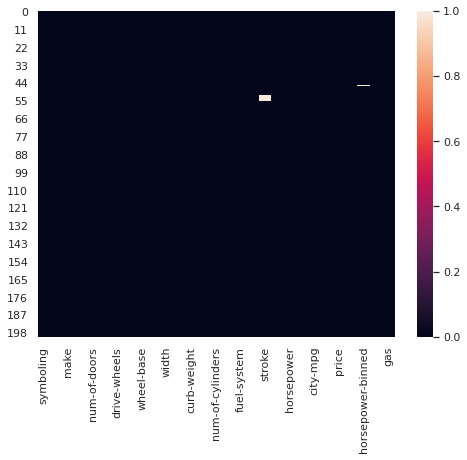

In [ ]:
# using heatmap to detect missing values
sns.heatmap(auto.isnull())
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()

## Bivariate Analysis
*   Numerical vs. Numerical
  1.   Scatterplot
  2.   Line plot
  3.   Heatmap for correlation
  4.   Joint plot
*   Categorical vs. Numerical
  1.   Bar chart
  2.   Voilin plot
  3.   Categorical box plot
  4.   Swarm plot
*   Categorical vs. Categorical
  1.   Bar Chart
  2.   Grouped bar chart
  3.   Point plot



### Correlations

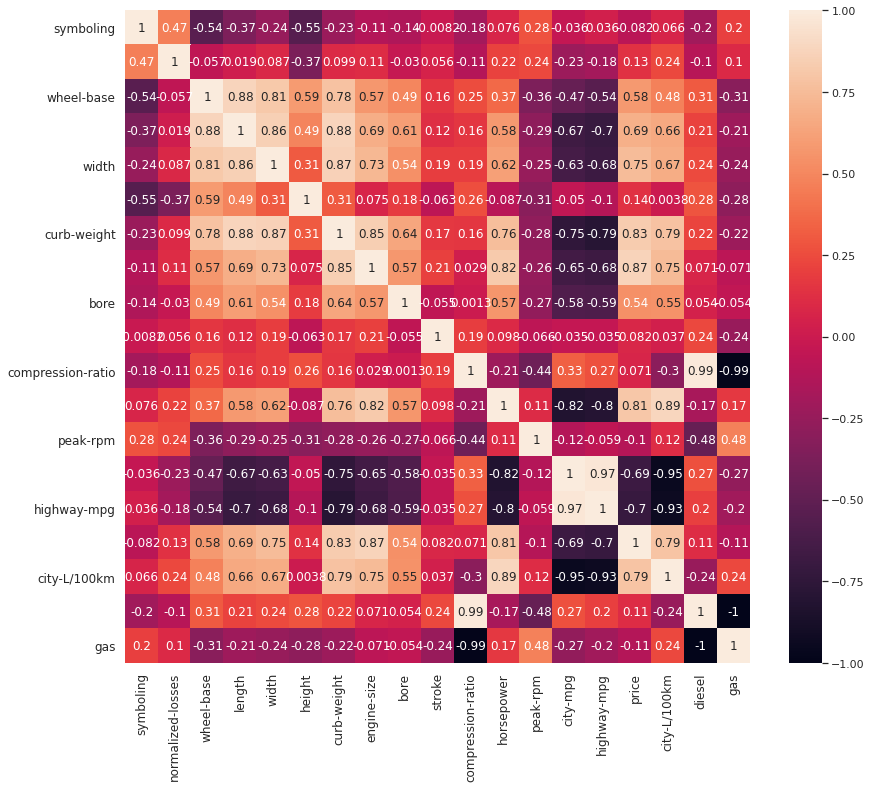

In [ ]:
correlation_matrix = auto.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
fig = plt.gcf()
fig.set_size_inches(14, 12)
plt.show()

### Line Chart

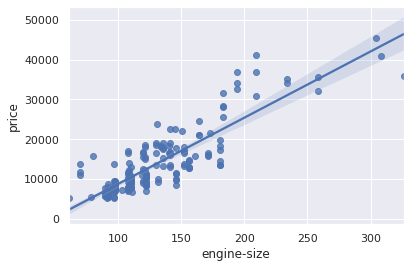

In [ ]:
# Largest R^2: 0.87 (price and engine-size)
sns.regplot(x='engine-size',y='price',data=auto)

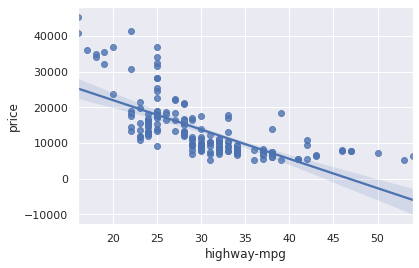

In [ ]:
# Lowest R^2: -0.7 (price and highway-mpg)
sns.regplot(x='highway-mpg',y='price',data=auto)

### Bar Chart

In [ ]:
mean_price = auto.groupby('make').mean()['price']
mean_price = pd.DataFrame(mean_price)
mean_price = mean_price.sort_values(by = ['price'])

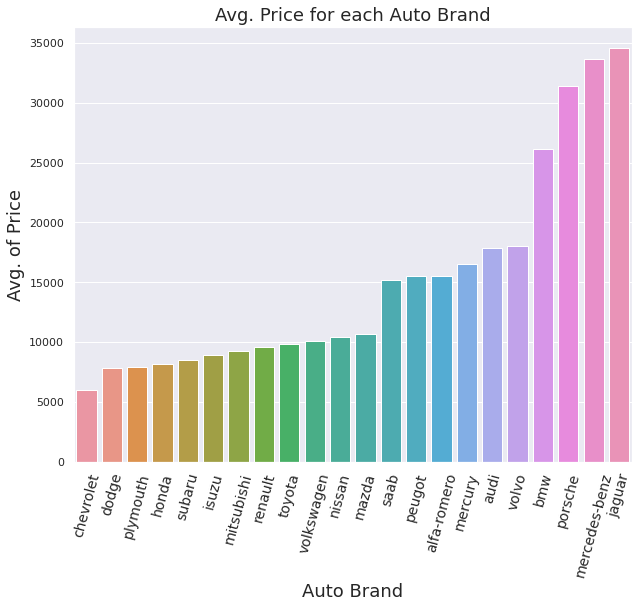

In [ ]:
sns.set(style = 'darkgrid')
sns.barplot(mean_price.index, mean_price['price'], alpha = 1)
plt.title('Avg. Price for each Auto Brand', fontsize=18)
plt.ylabel('Avg. of Price', fontsize=18)
plt.xlabel('Auto Brand', fontsize=18)
plt.xticks(fontsize=14, rotation = 75)
fig = plt.gcf()
fig.set_size_inches(10, 8)
#plt.grid()
plt.show()